# Lab 4 - Investigating the Performance Advantages of NumPy Arrays

At a high level, the purpose of this lab is to test how much more efficient bulk, vectorized operations can by (using NumPy arrays) than standard, dictionary-oriented Python computations.

In this lab, your task is to compare three different solutions to the co-occurrence problem. This is a very fundamental computation in text analytics. 

In a nutshell:
  * we have **n** documents
  * each document is represented as a map from "wordId" to "# of times it appears in the document"
    * `{0: 10, 1: 2, ..., 19: 5}` indicates a document where word 0 appears 10 times, 
      word 1 two times, and word 19 five times.
    * if a "wordId" is **not present** in a document dictionary, treat it as a count of 0
    * in subtask 2 & 3, this "map" is a numpy array in which the index is the wordId
  * the corpus is represented as a map from "docId" to "document"
    * in subtask 2 & 3, this "map" is a numpy array in which the index is the docId.

For each of the possible (word, word) pairs, we want to compute the number of documents (i.e. value must be between zero and  **n**) that have that particular (word, word) pair. That is, compute the co-occurrence of each possible word pair in the corpus of documents.

For example, let’s say our documents are:
```
doc 1: [word1, word2, word4, word5]
doc 2: [word1, word2, word5]
doc 3: [word2, word3, word5]
```
Then the result of the co-occurrence computation is:
```
{word1, word1}: 2 co-occurs (meaning that word1 occurs in two documents in the corpus)
{word1, word2}: 2 co-occurs
{word1, word4}: 1 co-occurs
{word1, word5}: 2 co-occurs
{word2, word2}: 3 co-occurs
{word2, word3}: 1 co-occurs
{word2, word4}: 1 co-occurs
{word2, word5}: 3 co-occurs
{word3, word3}: 1 co-occurs
{word3, word5}: 1 co-occurs
{word4, word4}: 1 co-occurs
{word4, word5}: 1 co-occurs
{word5, word5}: 3 co-occurs
```
Given that, here are the lab’s three subtasks:

## Subtask One
First, run the pure, dictionary-based LDA implementation provided (this is the first one)
to build a document corpus (just like in the last numpy array lab). This will build the wordsInCorpus
object, which is a Python dictionary. The dictionary’s key is a document identifier, and
the value is another dictionary. For the dictionary associated with a particular document
identifier, the key is a word identifier, and the value is the number of occurrences of the
word in the document. Visually:

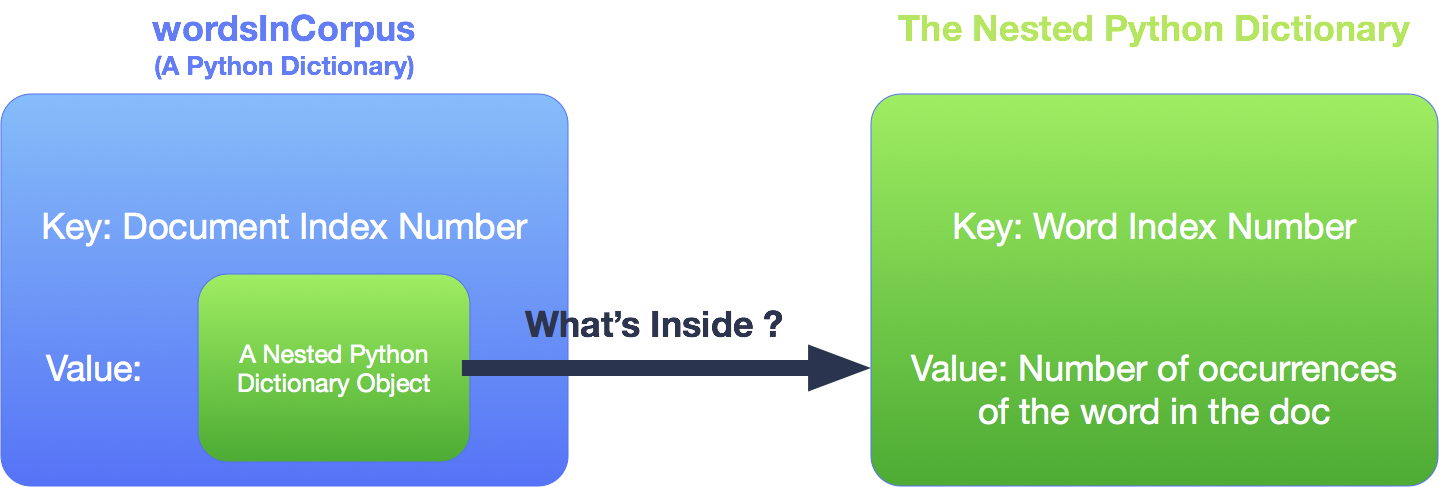

In [1]:
import numpy as np
import time;
 
# this returns a number whose probability of occurence is p
def sampleValue (p):
    return np.flatnonzero (np.random.multinomial (1, p, 1))[0]
 
# there are 2000 words in the corpus
alpha = np.full (2000, .1)
 
# there are 100 topics
beta = np.full (100, .1)
 
# this gets us the probabilty of each word happening in each of the 100 topics
wordsInTopic = np.random.dirichlet (alpha, 100)
# wordsInCorpus[i] will be a dictionary that gives us the number of each word in the document
wordsInCorpus = {}
 
# generate each doc
for doc in range (0, 50):
    #
    # no words in this doc yet
    wordsInDoc = {}
    #
    # get the topic probabilities for this doc
    topicsInDoc = np.random.dirichlet (beta)
    #
    # generate each of the 2000 words in this document
    for word in range (0, 2000):
        #
        # select the topci and the word
        whichTopic = sampleValue (topicsInDoc)
        whichWord = sampleValue (wordsInTopic[whichTopic])
        #
        # and record the word
        wordsInDoc [whichWord] = wordsInDoc.get (whichWord, 0) + 1
        #
    # now, remember this document
    wordsInCorpus [doc] = wordsInDoc

In case you don’t remember, here are some common ways to loop through a python dictionary:

In [ ]:
# loop through keys and values together
for key, value in wordsInCorpus.items():
    # code here
    pass

In [ ]:
# loop through keys
for key in wordsInCorpus:
    # code here
    pass

In [ ]:
# loop through values
for value in wordsInCorpus.values():
    # code here
    pass

### your subtask one code here

In [ ]:
start = time.time()
# coOccurrences will be a map where the key is a
# (wordOne, wordTwo) pair, and the value is the number of times
# those two words co-occurred
# initialize coOccurences
coOccurrences = {}

# now, have a nested loop that fils up coOccurrences
#  YOUR  CODE  HERE

end = time.time()
end - start

## Subtask Two
Now, run the NumPy array-based LDA implementation in the next cell. This code will build the ```wordsInCorpus``` array. 

It stores the same data, but in a NumPy array. 
```
wordsInCorpus[34, 355] 
```
is the number of times that word 355 in the dictionary occurred in document 34.

Given this, write a NumPy code that loops through all of the documents. Treat each document as a vector whose length is the length of the corpus. Then you can use the [**outer product**](https://en.wikipedia.org/wiki/Outer_product) of the vector giving the word counts for that document with itself to create a matrix of co-occurrences for that document (if you don’t remember what an outer product is, click the link to review it on Wikipedia). Summing the 50 matrices gives the answer.

**hint**: in order to take a NumPy array ```foo``` and "clip" all of its entries between 0 and 1, use:
[```np.clip(foo, 0, 1)```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html)

To compute the outer product between two vectors or matrices, use:
[```np.outer(foo, bar)```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html)

### outer product

Recall, the [**outer product**](https://en.wikipedia.org/wiki/Outer_product) of two column vectors $u$ and $v$, where $u \in \mathbb{R}^m$ and $v \in \mathbb{R}^n$ is defined as:

$$
\begin{bmatrix}
u_1\\
u_2\\
\vdots \\
u_m\\
\end{bmatrix}
\bigotimes
\begin{bmatrix}
v_1 & v_2 & \ldots & v_n\\
\end{bmatrix}
= uv^T =
\begin{bmatrix}
u_1v_1 & u_1v_2 & \ldots & u_1v_n\\
u_2v_1 & u_2v_2 & \ldots & u_2v_n\\
\vdots & \vdots & \ddots & \vdots \\
u_mv_1 & u_mv_2 & \ldots & u_mv_n\\
\end{bmatrix}
$$

### array-based LDA


In [ ]:
import numpy as np
import time
 
# there are 2000 words in the corpus
alpha = np.full (2000, .1)
 
# there are 100 topics
beta = np.full (100, .1)
 
# this gets us the probabilty of each word happening in each of the 100 topics
wordsInTopic = np.random.dirichlet (alpha, 100)
 
# wordsInCorpus[i] will give us the vector of words in document i
wordsInCorpus = np.zeros ((50, 2000))
 
# generate each doc
for doc in range (0, 50):
    #
    # get the topic probabilities for this doc
    topicsInDoc = np.random.dirichlet (beta)
    #
    # assign each of the 2000 words in this doc to a topic
    wordsToTopic = np.random.multinomial (2000, topicsInDoc)
    # 
    # and generate each of the 2000 words
    for topic in range (0, 100):
        wordsFromCurrentTopic = np.random.multinomial (wordsToTopic[topic], wordsInTopic[topic])
        wordsInCorpus[doc] = np.add (wordsInCorpus[doc], wordsFromCurrentTopic)

### your subtask 2 code here

In [ ]:
start = time.time()
# coOccurrences[i, j] will give the count of the number of times that
# word i and word j appear in the same document in the corpus
coOccurrences = np.zeros ((2000, 2000))
# now, have a loop that fils up coOccurrences
# YOUR CODE HERE
end = time.time()
end - start

## Subtask Three

Now, write a code that uses a single matrix multiplication operation to create coOccurrences. Note that you can use the ```transpose``` operation to transpose a matrix, and ```np.dot()``` will multiply two matrices. Your solution should not contain any loops.

Recall, the [**product**](https://en.wikipedia.org/wiki/Matrix_multiplication) of two matrices $A$ and $B$, where $A \in \mathbb{R}^{n \times m}$ and $B \in \mathbb{R}^{m \times p}$ is a $n \times p$ dimension matrix $C$:


$$
\begin{bmatrix}
a_{1,1} & a_{1,2} & \ldots & a_{1,m} \\
a_{2,1} & a_{2,2} & \ldots & a_{2,m} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n,1} & a_{n,2} & \ldots & a_{n,m} \\
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} & \ldots & b_{1,p} \\
b_{2,1} & b_{2,2} & \ldots & b_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
b_{m,1} & b_{m,2} & \ldots & b_{m,p} \\
\end{bmatrix}
=
\begin{bmatrix}
c_{1,1} & c_{1,2} & \ldots & c_{1,p} \\
c_{2,1} & c_{2,2} & \ldots & c_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
c_{n,1} & c_{n,2} & \ldots & c_{n,p} \\
\end{bmatrix}
$$


where each entry, $C_{ij} = \langle A_i, B_{\cdot,j} \rangle = \sum_{k=1}^m A_{i,k}B_{k,j}$. Note that $B_{\cdot,j}$ indicates the $j^{th}$ column of $B$ and $A_i$ indicates the $i^{th}$ row of $A$.

### your subtask three code here

In [ ]:
start = time.time()
# now, create coOccurrences via a matrix multiply
# YOUR CODE HERE
end = time.time()
end - start

Copyright ©  2019 Rice University

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.